In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("modified_generated_data_500.csv")
data

,Height_cm,Weight_kg,Age_years,Gender,Category
0,187,75,50,0,1
1,174,69,56,0,1
2,179,86,49,1,0
3,192,66,40,1,0
4,188,64,45,1,0
...,...,...,...,...,...
495,169,76,37,0,0
496,163,67,49,0,0
497,164,71,37,1,0
498,159,52,57,1,1


In [2]:
data.shape

(500, 5)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height_cm  500 non-null    int64
 1   Weight_kg  500 non-null    int64
 2   Age_years  500 non-null    int64
 3   Gender     500 non-null    int64
 4   Category   500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [4]:
data.describe()

,Height_cm,Weight_kg,Age_years,Gender,Category
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,169.242000,68.530000,40.718000,0.510000,0.414000
std,9.988342,14.654645,13.479089,0.500401,0.493042
min,142.000000,24.000000,18.000000,0.000000,0.000000
25%,163.000000,59.000000,29.000000,0.000000,0.000000
50%,169.000000,68.000000,41.000000,1.000000,0.000000
75%,176.000000,77.000000,52.250000,1.000000,1.000000
max,196.000000,111.000000,64.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Height_cm'}>,
        <Axes: title={'center': 'Weight_kg'}>],
       [<Axes: title={'center': 'Age_years'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Category'}>, <Axes: >]], dtype=object)

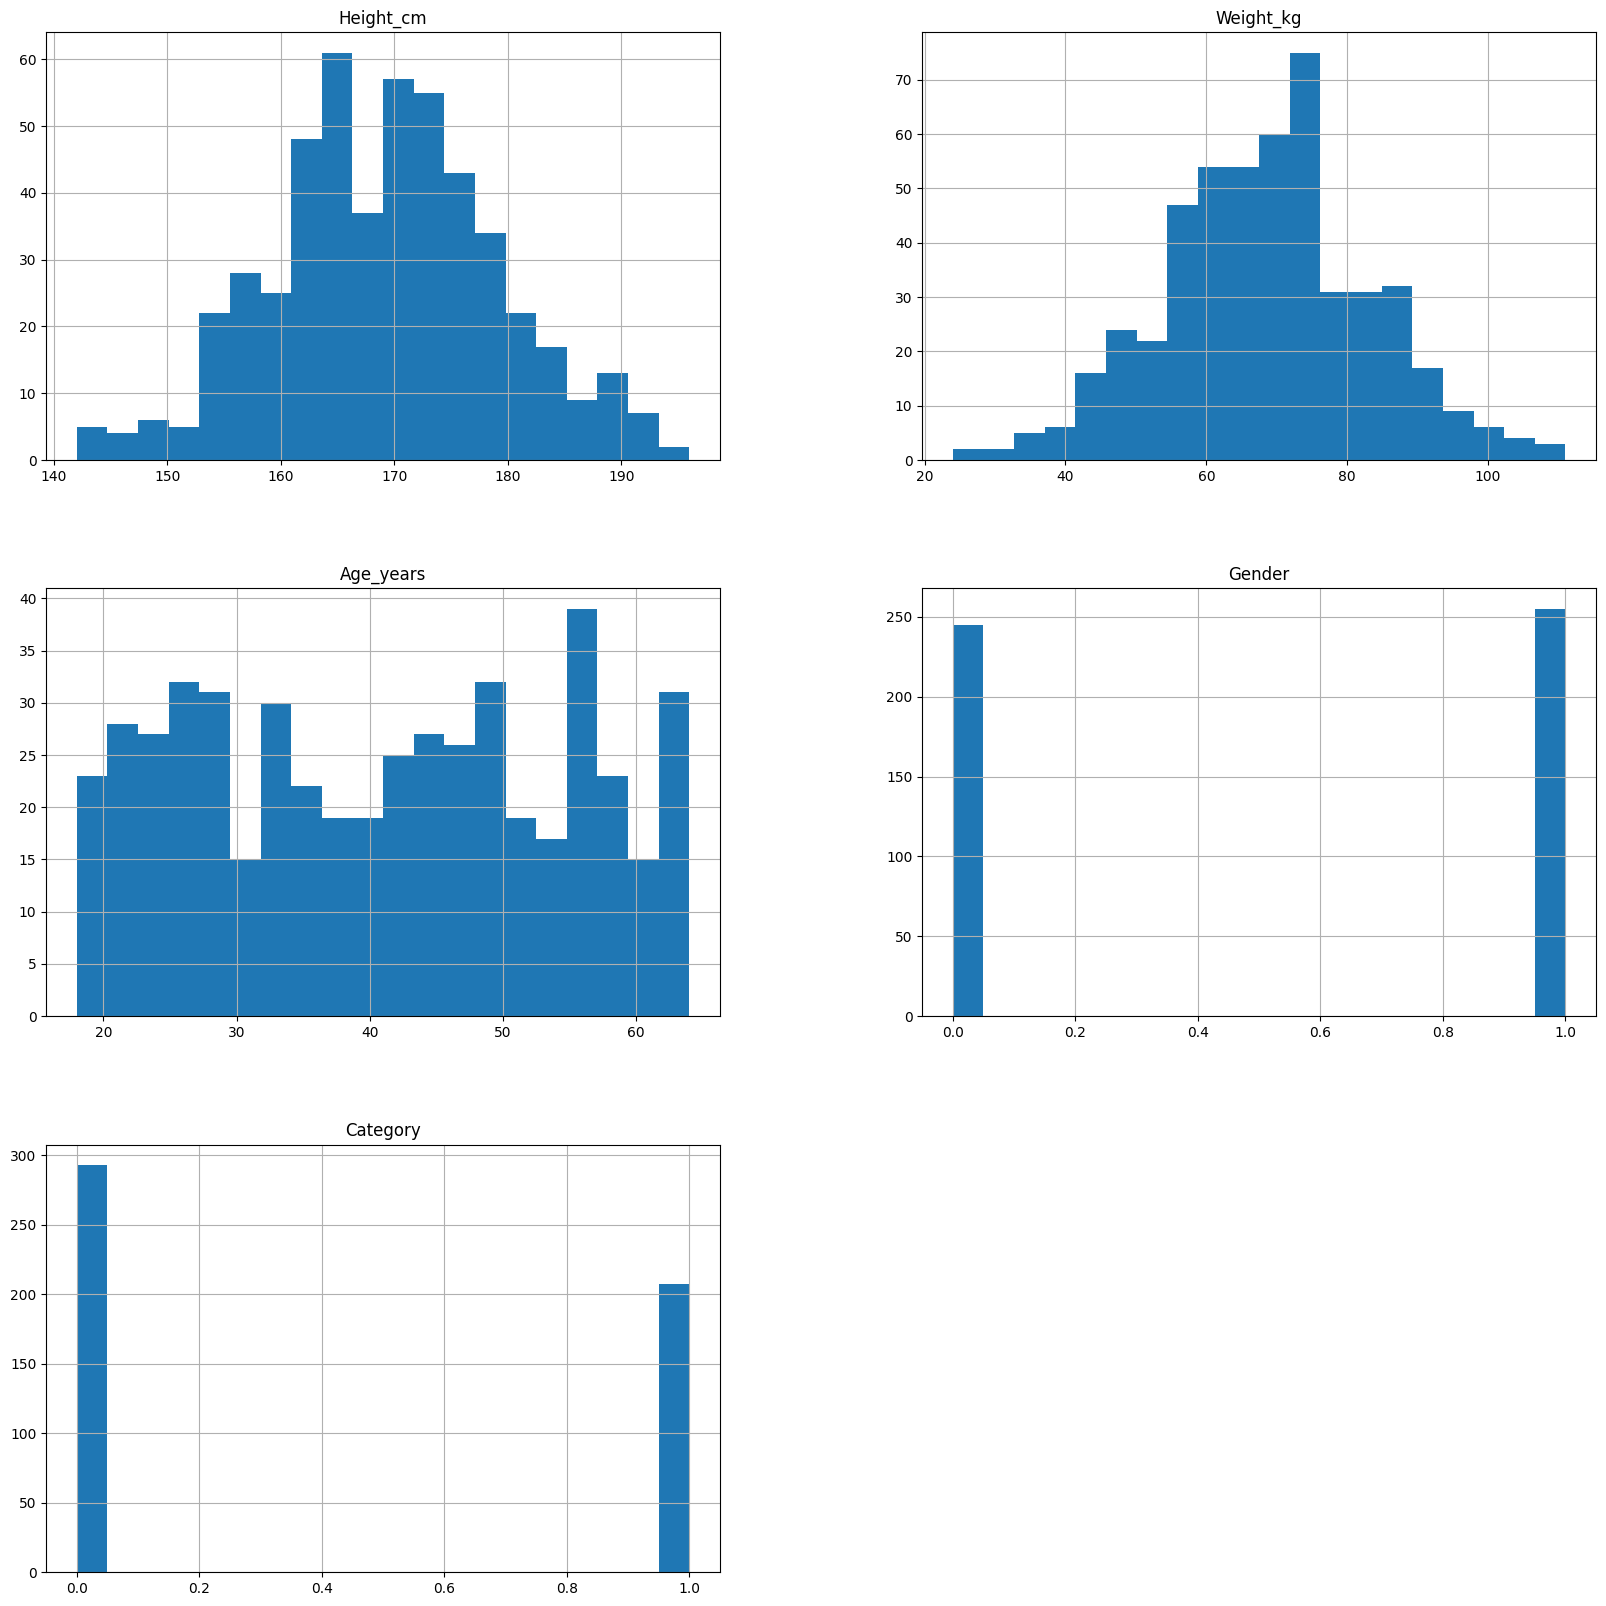

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20,20))

## Split into Train and Test data sets

In [6]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    #print(shuffled)
    test_size = int(test_ratio*len(data))
    trainIndices = shuffled[test_size:]
    testIndices = shuffled[:test_size]
    return data.iloc[trainIndices],data.iloc[testIndices]
train_set, test_set = split_train_test(data, 0.2)

In [7]:
data['Gender'].value_counts()

Gender
1    255
0    245
Name: count, dtype: int64

In [8]:
data['Category'].value_counts()

Category
0    293
1    207
Name: count, dtype: int64

## Feature Scaling Using MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(data)
data = pd.DataFrame(X, columns=data.columns)
data.describe()

,Height_cm,Weight_kg,Age_years,Gender,Category
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.504481,0.511839,0.493870,0.510000,0.414000
std,0.184969,0.168444,0.293024,0.500401,0.493042
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388889,0.402299,0.239130,0.000000,0.000000
50%,0.500000,0.505747,0.500000,1.000000,0.000000
75%,0.629630,0.609195,0.744565,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting using StratifiedShuffleSplit

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in sss.split(data, data['Category']):
    strat_train_set=data.loc[trainIndex]
    strat_test_set=data.loc[testIndex]
x_train = strat_train_set.drop("Category",axis=1)
y_train = strat_train_set["Category"]
x_test = strat_test_set.drop("Category",axis=1)
y_test = strat_test_set["Category"]

In [11]:
strat_train_set['Category'].value_counts()

Category
0.0    234
1.0    166
Name: count, dtype: int64

In [12]:
strat_test_set['Category'].value_counts()

Category
0.0    59
1.0    41
Name: count, dtype: int64

In [13]:
233/166

1.4036144578313252

In [14]:
59/41

1.4390243902439024

## Analysing Correlations

In [15]:
selected_features = ['Height_cm', 'Weight_kg', 'Age_years','Gender']  
corr_matrix = data[selected_features].corr()
corr_matrix

,Height_cm,Weight_kg,Age_years,Gender
Height_cm,1.000000,-0.042197,-0.018515,-0.032761
Weight_kg,-0.042197,1.000000,-0.054341,0.057621
Age_years,-0.018515,-0.054341,1.000000,0.015720
Gender,-0.032761,0.057621,0.015720,1.000000


In [16]:
corr_matrix['Gender'].sort_values(ascending=False)

Gender       1.000000
Weight_kg    0.057621
Age_years    0.015720
Height_cm   -0.032761
Name: Gender, dtype: float64

array([[<Axes: xlabel='Height_cm', ylabel='Height_cm'>,
        <Axes: xlabel='Weight_kg', ylabel='Height_cm'>,
        <Axes: xlabel='Age_years', ylabel='Height_cm'>,
        <Axes: xlabel='Gender', ylabel='Height_cm'>],
       [<Axes: xlabel='Height_cm', ylabel='Weight_kg'>,
        <Axes: xlabel='Weight_kg', ylabel='Weight_kg'>,
        <Axes: xlabel='Age_years', ylabel='Weight_kg'>,
        <Axes: xlabel='Gender', ylabel='Weight_kg'>],
       [<Axes: xlabel='Height_cm', ylabel='Age_years'>,
        <Axes: xlabel='Weight_kg', ylabel='Age_years'>,
        <Axes: xlabel='Age_years', ylabel='Age_years'>,
        <Axes: xlabel='Gender', ylabel='Age_years'>],
       [<Axes: xlabel='Height_cm', ylabel='Gender'>,
        <Axes: xlabel='Weight_kg', ylabel='Gender'>,
        <Axes: xlabel='Age_years', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>]], dtype=object)

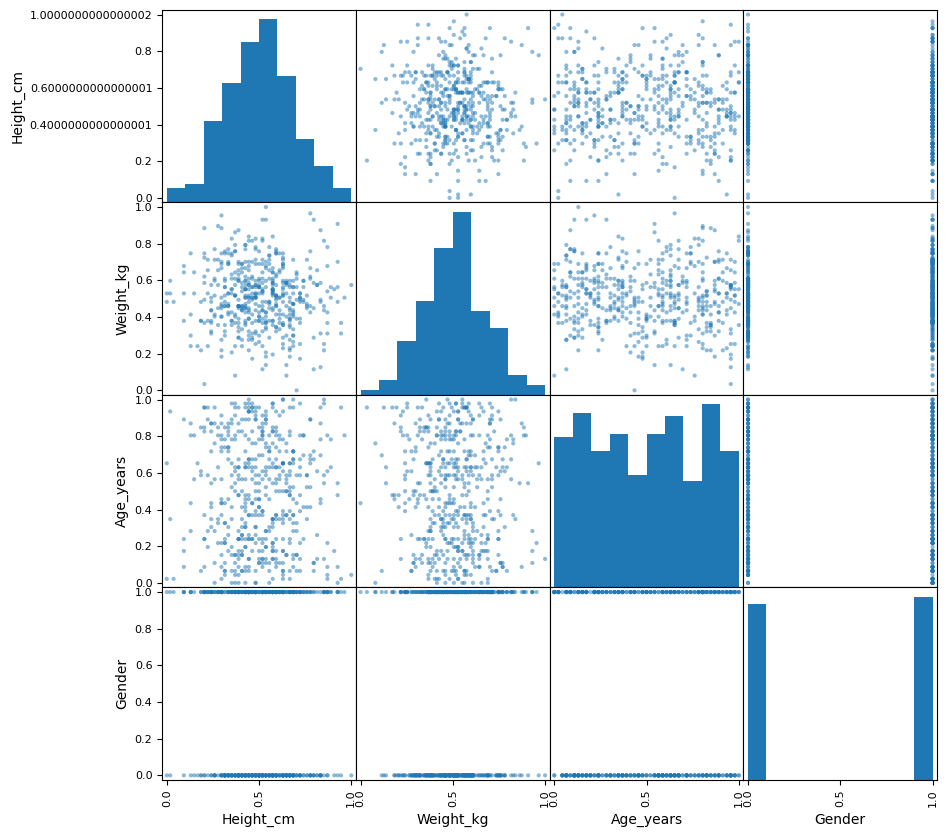

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[selected_features], figsize=(10,10))

## Selecting Best Model

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifiers
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

# Fit each classifier
log_reg.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [19]:
log_reg_pred=log_reg.predict(x_test)
decision_tree_pred=decision_tree.predict(x_test)
random_forest_pred=random_forest.predict(x_test)
svc_pred=svc.predict(x_test)
knn_pred=knn.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

log_reg_acc = accuracy_score(y_test, log_reg_pred)
decision_tree_acc = accuracy_score(y_test, decision_tree_pred)
random_forest_acc = accuracy_score(y_test, random_forest_pred)
svc_acc = accuracy_score(y_test, svc_pred)
knn_acc = accuracy_score(y_test, knn_pred)

print("Accuracy for Logistic Regression:", log_reg_acc*100)
print("Accuracy for Decision Tree Classifier:", decision_tree_acc*100)
print("Accuracy for Random Forest Classifier:", random_forest_acc*100)
print("Accuracy for SVC:", svc_acc*100)
print("Accuracy for KNN:", knn_acc*100)



Accuracy for Logistic Regression: 53.0
Accuracy for Decision Tree Classifier: 91.0
Accuracy for Random Forest Classifier: 93.0
Accuracy for SVC: 71.0
Accuracy for KNN: 77.0


## Best Model : Random Forest Classifier

In [25]:
print(np.array(y_test))
print(random_forest_pred)

[1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0.]
[1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0.]
